In [ ]:
# This walks through the steps in Chpt. 2 of 'Hands-On Machine Learning with Scikit-Learn and 
# TensorFlow' by Géron, but with a different dataset, obtained at
# https://www.kaggle.com/tunguz/covid19-vaccinations-in-the-united-states-county

# Created from parent 2021 Nov. 24 by E.S.

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

from zlib import crc32
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
STEM = "/Users/bandari/Documents/git.repos/ml/"
DATA_PATH = os.path.join(STEM, "datasets")

In [3]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(DATA_PATH, "mount_everest_deaths.csv")
    return pd.read_csv(csv_path)

In [4]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [6]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [7]:
df = load_data()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             310 non-null    int64  
 1   Name            310 non-null    object 
 2   Date            310 non-null    object 
 3   Age             160 non-null    float64
 4   Expedition      271 non-null    object 
 5   Nationality     309 non-null    object 
 6   Cause of death  296 non-null    object 
 7   Location        291 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 19.5+ KB


In [9]:
# make a year column

df["Year"] = pd.DatetimeIndex(df["Date"]).year

In [10]:
df.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location,Year
0,1,Dorje,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922
1,2,Lhakpa,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922
2,3,Norbu,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922
3,4,Pasang,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922
4,5,Pema,"June 7, 1922",NaN,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922


In [11]:
df.describe()

,No.,Age,Year
count,310.000000,160.000000,310.000000
mean,155.500000,40.356250,1995.390323
std,89.633513,12.244545,20.619042
min,1.000000,19.000000,1922.000000
25%,78.250000,31.750000,1985.000000
50%,155.500000,38.000000,1997.000000
75%,232.750000,48.000000,2012.000000
max,310.000000,85.000000,2021.000000


In [12]:
# turn some string quantities into numerical ones ('encode')
# and show what the numbers stand for

# remove NaNs first
df["Expedition"].fillna("unk", inplace=True)
df["Cause of death"].fillna("unk", inplace=True)
df["Nationality"].fillna("unk", inplace=True)
df["Location"].fillna("unk", inplace=True)
df["Age"].fillna(0, inplace=True)

ordinal_encoder = OrdinalEncoder()
df["Expedition_encoded"] = ordinal_encoder.fit_transform(df[["Expedition"]])
print(ordinal_encoder.categories_)
print("----")
df["Cause_of_death_encoded"] = ordinal_encoder.fit_transform(df[["Cause of death"]])
print(ordinal_encoder.categories_)
print("----")
df["Nationality_encoded"] = ordinal_encoder.fit_transform(df[["Nationality"]])
print(ordinal_encoder.categories_)
print("----")
df["Location_encoded"] = ordinal_encoder.fit_transform(df[["Location"]])
print(ordinal_encoder.categories_)
print("----")

[array(['"Makalu" Gau Ming-Ho Taiwanese expedition',
       '1922 British Mount Everest Expedition',
       '1924 British Mount Everest Expedition',
       '1975 British Mount Everest Southwest Face expedition',
       '2015 Jagged Globe Everest Expedition',
       '35th Anniversary climb with Chinese, Japanese and Nepalese nationals',
       '360 Expeditions', "40th anniversary of Tenzing Norgay's climb",
       '7 Summits Club', '7 Summits Club Everest expedition',
       '7 Summits Club Expedition', 'AAI Everest Expedition 2014',
       'Adventure Consultants', 'Adventurist Everest Expedition 2014',
       'American', 'American Expedition', 'American expedition',
       'Arnold Coster Expeditions', 'Arun Treks and Expedition',
       'Asian Trekking', 'Australian', 'Australian Expedition',
       'Australian-New Zealand Expedition', 'Austrian',
       'Austrian solo expedition', 'Belgian International',
       'Bill March Canadian Expedition',
       "Bonington's 1975 Everest expedi

In [13]:
df.head()

,No.,Name,Date,Age,Expedition,Nationality,Cause of death,Location,Year,Expedition_encoded,Cause_of_death_encoded,Nationality_encoded,Location_encoded
0,1,Dorje,"June 7, 1922",0.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922,1.0,6.0,19.0,75.0
1,2,Lhakpa,"June 7, 1922",0.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922,1.0,6.0,19.0,75.0
2,3,Norbu,"June 7, 1922",0.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922,1.0,6.0,19.0,75.0
3,4,Pasang,"June 7, 1922",0.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922,1.0,6.0,19.0,75.0
4,5,Pema,"June 7, 1922",0.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,1922,1.0,6.0,19.0,75.0


array([[<AxesSubplot:xlabel='No.', ylabel='No.'>,
        <AxesSubplot:xlabel='Age', ylabel='No.'>,
        <AxesSubplot:xlabel='Year', ylabel='No.'>,
        <AxesSubplot:xlabel='Expedition_encoded', ylabel='No.'>,
        <AxesSubplot:xlabel='Cause_of_death_encoded', ylabel='No.'>,
        <AxesSubplot:xlabel='Nationality_encoded', ylabel='No.'>,
        <AxesSubplot:xlabel='Location_encoded', ylabel='No.'>],
       [<AxesSubplot:xlabel='No.', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Year', ylabel='Age'>,
        <AxesSubplot:xlabel='Expedition_encoded', ylabel='Age'>,
        <AxesSubplot:xlabel='Cause_of_death_encoded', ylabel='Age'>,
        <AxesSubplot:xlabel='Nationality_encoded', ylabel='Age'>,
        <AxesSubplot:xlabel='Location_encoded', ylabel='Age'>],
       [<AxesSubplot:xlabel='No.', ylabel='Year'>,
        <AxesSubplot:xlabel='Age', ylabel='Year'>,
        <AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSub

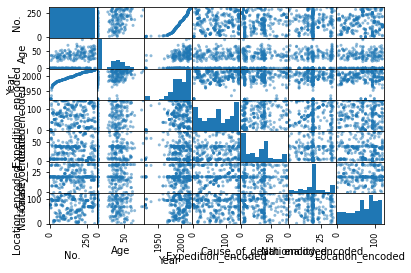

In [14]:
# make historgrams, correlation plots

# df.hist() # redundant

scatter_matrix(df)

In [15]:
df.keys()

Index(['No.', 'Name', 'Date', 'Age', 'Expedition', 'Nationality',
       'Cause of death', 'Location', 'Year', 'Expedition_encoded',
       'Cause_of_death_encoded', 'Nationality_encoded', 'Location_encoded'],
      dtype='object')

In [16]:
# make a 'pipeline' to feature scale

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

# drop non-numerical features
df_dropped = df.drop(columns=["Name","Date","Expedition","Nationality","Cause of death","Location"], inplace=False)

data_preprocessed = num_pipeline.fit_transform(df_dropped)

# the syntax here is necessary to restore column keys
df_preprocessed = pd.DataFrame(num_pipeline.fit_transform(df_dropped),columns = df_dropped.columns)

In [17]:
df_preprocessed

,No.,Age,Year,Expedition_encoded,Cause_of_death_encoded,Nationality_encoded,Location_encoded
0,-1.726473,-0.947134,-3.565102,-1.612504,-1.054870,-0.029645,0.134765
1,-1.715298,-0.947134,-3.565102,-1.612504,-1.054870,-0.029645,0.134765
2,-1.704123,-0.947134,-3.565102,-1.612504,-1.054870,-0.029645,0.134765
3,-1.692949,-0.947134,-3.565102,-1.612504,-1.054870,-0.029645,0.134765
4,-1.681774,-0.947134,-3.565102,-1.612504,-1.054870,-0.029645,0.134765
...,...,...,...,...,...,...,...
305,1.681774,1.872119,1.146894,-0.736604,-0.735212,1.808353,1.235733
306,1.692949,1.553817,1.244048,0.883812,-0.050232,1.808353,0.908418
307,1.704123,0.917211,1.244048,0.883812,-0.050232,1.318220,0.908418
308,1.715298,0.326077,1.244048,-0.736604,0.543418,-0.029645,0.164521


In [18]:
df_preprocessed.describe()

,No.,Age,Year,Expedition_encoded,Cause_of_death_encoded,Nationality_encoded,Location_encoded
count,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,0.000000,6.876220e-17,-4.950878e-15,-3.438110e-17,-6.589711e-17,-2.005564e-17,7.735748e-17
std,1.001617,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.726473,-9.471343e-01,-3.565102e+00,-1.634402e+00,-1.328862e+00,-2.357777e+00,-2.096926e+00
25%,-0.863236,-9.471343e-01,-5.047335e-01,-9.117840e-01,-1.054870e+00,-5.197781e-01,-7.579112e-01
50%,0.000000,5.324605e-02,7.819374e-02,-2.493491e-02,8.676418e-02,-2.964514e-02,1.347654e-01
75%,0.863236,7.807954e-01,8.068528e-01,9.002349e-01,4.520870e-01,4.604878e-01,8.191507e-01
max,1.726473,2.917972e+00,1.244048e+00,1.453147e+00,2.187371e+00,2.053420e+00,1.444024e+00


In [19]:
# split into training and test sets

train_set, test_set = split_train_test(df_preprocessed, 0.2)

In [20]:
# separate training set into predictors (the things that help us predict)
# and labels (the things we want to predict)

data_predictors = train_set.drop("Year", axis=1)
data_labels = train_set["Year"].copy()

## Model training

### linear model

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_predictors, data_labels)

LinearRegression()

In [22]:
# see a few examples

print("Predictions: ", lin_reg.predict(data_predictors)[:5])
print("Labels: ", list(data_labels)[:5])

Predictions:  [ 0.6988428   1.16222387 -0.94340962  1.34053241 -1.16507792]
Labels:  [0.7582755518957982, 0.9525846414495894, -0.7476198921460839, 1.2440482757802764, -0.6504653473691883]


In [24]:
data_predictions = lin_reg.predict(data_predictors)

In [29]:
lin_reg.coef_

array([ 0.86615649, -0.00657976,  0.08764834,  0.01077496, -0.03100073,
       -0.05701514])

In [31]:
# see rmse of whole dataset

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(data_labels, data_predictions) # squeeze so both are pandas series
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

0.3747056044913529


### decision tree model (black box!)

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_predictors, data_labels)
data_predictions_dt = tree_reg.predict(data_predictors) # _dt: decision_tree
tree_mse = mean_squared_error(data_labels, data_predictions_dt)
tree_rmse = np.sqrt(tree_mse)

print(tree_rmse)

5.380620404582368e-17


### cross-validate

In [36]:
# p. 73
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree_reg, data_predictors, data_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores_tree)

scores_lin = cross_val_score(lin_reg, data_predictors, data_labels, 
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)

In [43]:
print(tree_rmse_scores)
print(tree_rmse_scores.std())

[0.02029926 0.11826949 0.02785321 0.01578694 0.10104185 0.18714737
 0.01913797 0.0327082  0.14892754 0.0671423 ]
0.058541581894591146


In [44]:
print(lin_rmse_scores)
print(lin_rmse_scores.std())

[0.45544268 0.45088529 0.17744119 0.25775355 0.2439213  0.70305878
 0.44117119 0.19697746 0.41914906 0.16589902]
0.16305652329457954


### a last model: random forest regressor

In [46]:
# p. 75
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_predictors, data_labels)

# predict, based on training set
data_predictions_forest = forest_reg.predict(data_predictors) # _dt: decision_tree
forest_mse = mean_squared_error(data_labels, data_predictions_forest)
forest_rmse = np.sqrt(tree_mse)

# test on validation sets
scores_forest = cross_val_score(forest_reg, data_predictors, data_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)

In [47]:
print(forest_rmse)

print(forest_rmse_scores)
print(forest_rmse_scores.std())

5.380620404582368e-17
[0.01928903 0.10687852 0.02851002 0.02141569 0.09074916 0.18034684
 0.0169687  0.0319727  0.1146355  0.06187734]
0.05182884849441782


### how to save/retrieve a model

In [48]:
import joblib

joblib.dump(forest_reg, "junk_forest.pkl")

['junk_forest.pkl']

In [49]:
my_model_loaded = joblib.load("junk_forest.pkl")

In [51]:
type(my_model_loaded)

sklearn.ensemble._forest.RandomForestRegressor

### do a grid search to tune hyperparameters

In [52]:
# p. 76
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [55]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring="neg_mean_squared_error",
                        return_train_score=True)

grid_search.fit(data_predictors, data_labels)

/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packa

/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [-0.0830839  -0.0558536  -0.06198937 -0.04285028 -0.03629981 -0.02571514
 -0.01798963 -0.00731901 -0.0096135          nan         nan         nan
 -0.04946067 -0.06611051 -0.05194163 -0.03528636 -0.04062054 -0.02390978]
  category=UserWarning
/Users/bandari/anaconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the train scores are non-finite: [-2.54657845e-02 -1.40936780e-02 -9.57419384e-03 -1.96177004e-02
 -7.95764489e-03 -3.57625959e-03 -1.45927977e-03 -1.94075796e-03
 -1.71236289e-03             nan             nan             nan
 -1.63477931e-33 -2.49845271e-32 -2.11446598e-33 -2.49845271e-32
 -3.04267384e-33 -2.54327436e-32]
  category=UserWarning


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10)

In [58]:
cvres = grid_search.cv_results_

In [59]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.28824278574912343 {'max_features': 2, 'n_estimators': 3}
0.2363336686973462 {'max_features': 2, 'n_estimators': 10}
0.2489766491291931 {'max_features': 2, 'n_estimators': 30}
0.20700309518101453 {'max_features': 4, 'n_estimators': 3}
0.19052508280448896 {'max_features': 4, 'n_estimators': 10}
0.16035940700876727 {'max_features': 4, 'n_estimators': 30}
0.1341254324452931 {'max_features': 6, 'n_estimators': 3}
0.08555120555701226 {'max_features': 6, 'n_estimators': 10}
0.09804845868383694 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
0.22239754368776699 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.25711963376757874 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.22790705923385007 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.18784664067477122 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.201545368926539

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[9.95453311e-01 3.08164200e-05 3.73604746e-04 2.57524900e-04
 2.45998329e-04 3.63874413e-03]


In [61]:
full_pipeline.named_transformers_

NameError: name 'full_pipeline' is not defined